## new api for remapping figure elements

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from importlib import reload

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
info = ei.SummaryInfo()

In [10]:
%%time
analysis_options = dict(orig=dict(),
                        pearson=dict(corr_method='pearson'),
                        reward_blank=dict(reward_blank=True),
                        speed_blank=dict(speed_blank=True))

for a, tp in analysis_options.items():
    _ = info.get_zone_rates_remap(overwrite=True, **tp)

error getting the trial sets CR_bo
Error Processing Session Cl_T3g_120118
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 632, in get_zone_rates_remap
    session_zone_rate_comp_table = session_info.get_zone_rates_remap(**params)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 3593, in get_zone_rates_remap
    df = ta.all_zone_remapping_analyses(corr_method=params['corr_method'],
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2923, in all_zone_remapping_analyses
    bcorrs = _inner_loop(parallel)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2910, in _inner_loop
    bcorrs[cond_pair] = self.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair,
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2800, in zone_rate_maps_bal_conds_

In [8]:
pf = reload(pf)
f = pf.RemapFigures(remap_comp='cue')

(<Figure size 3600x2100 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

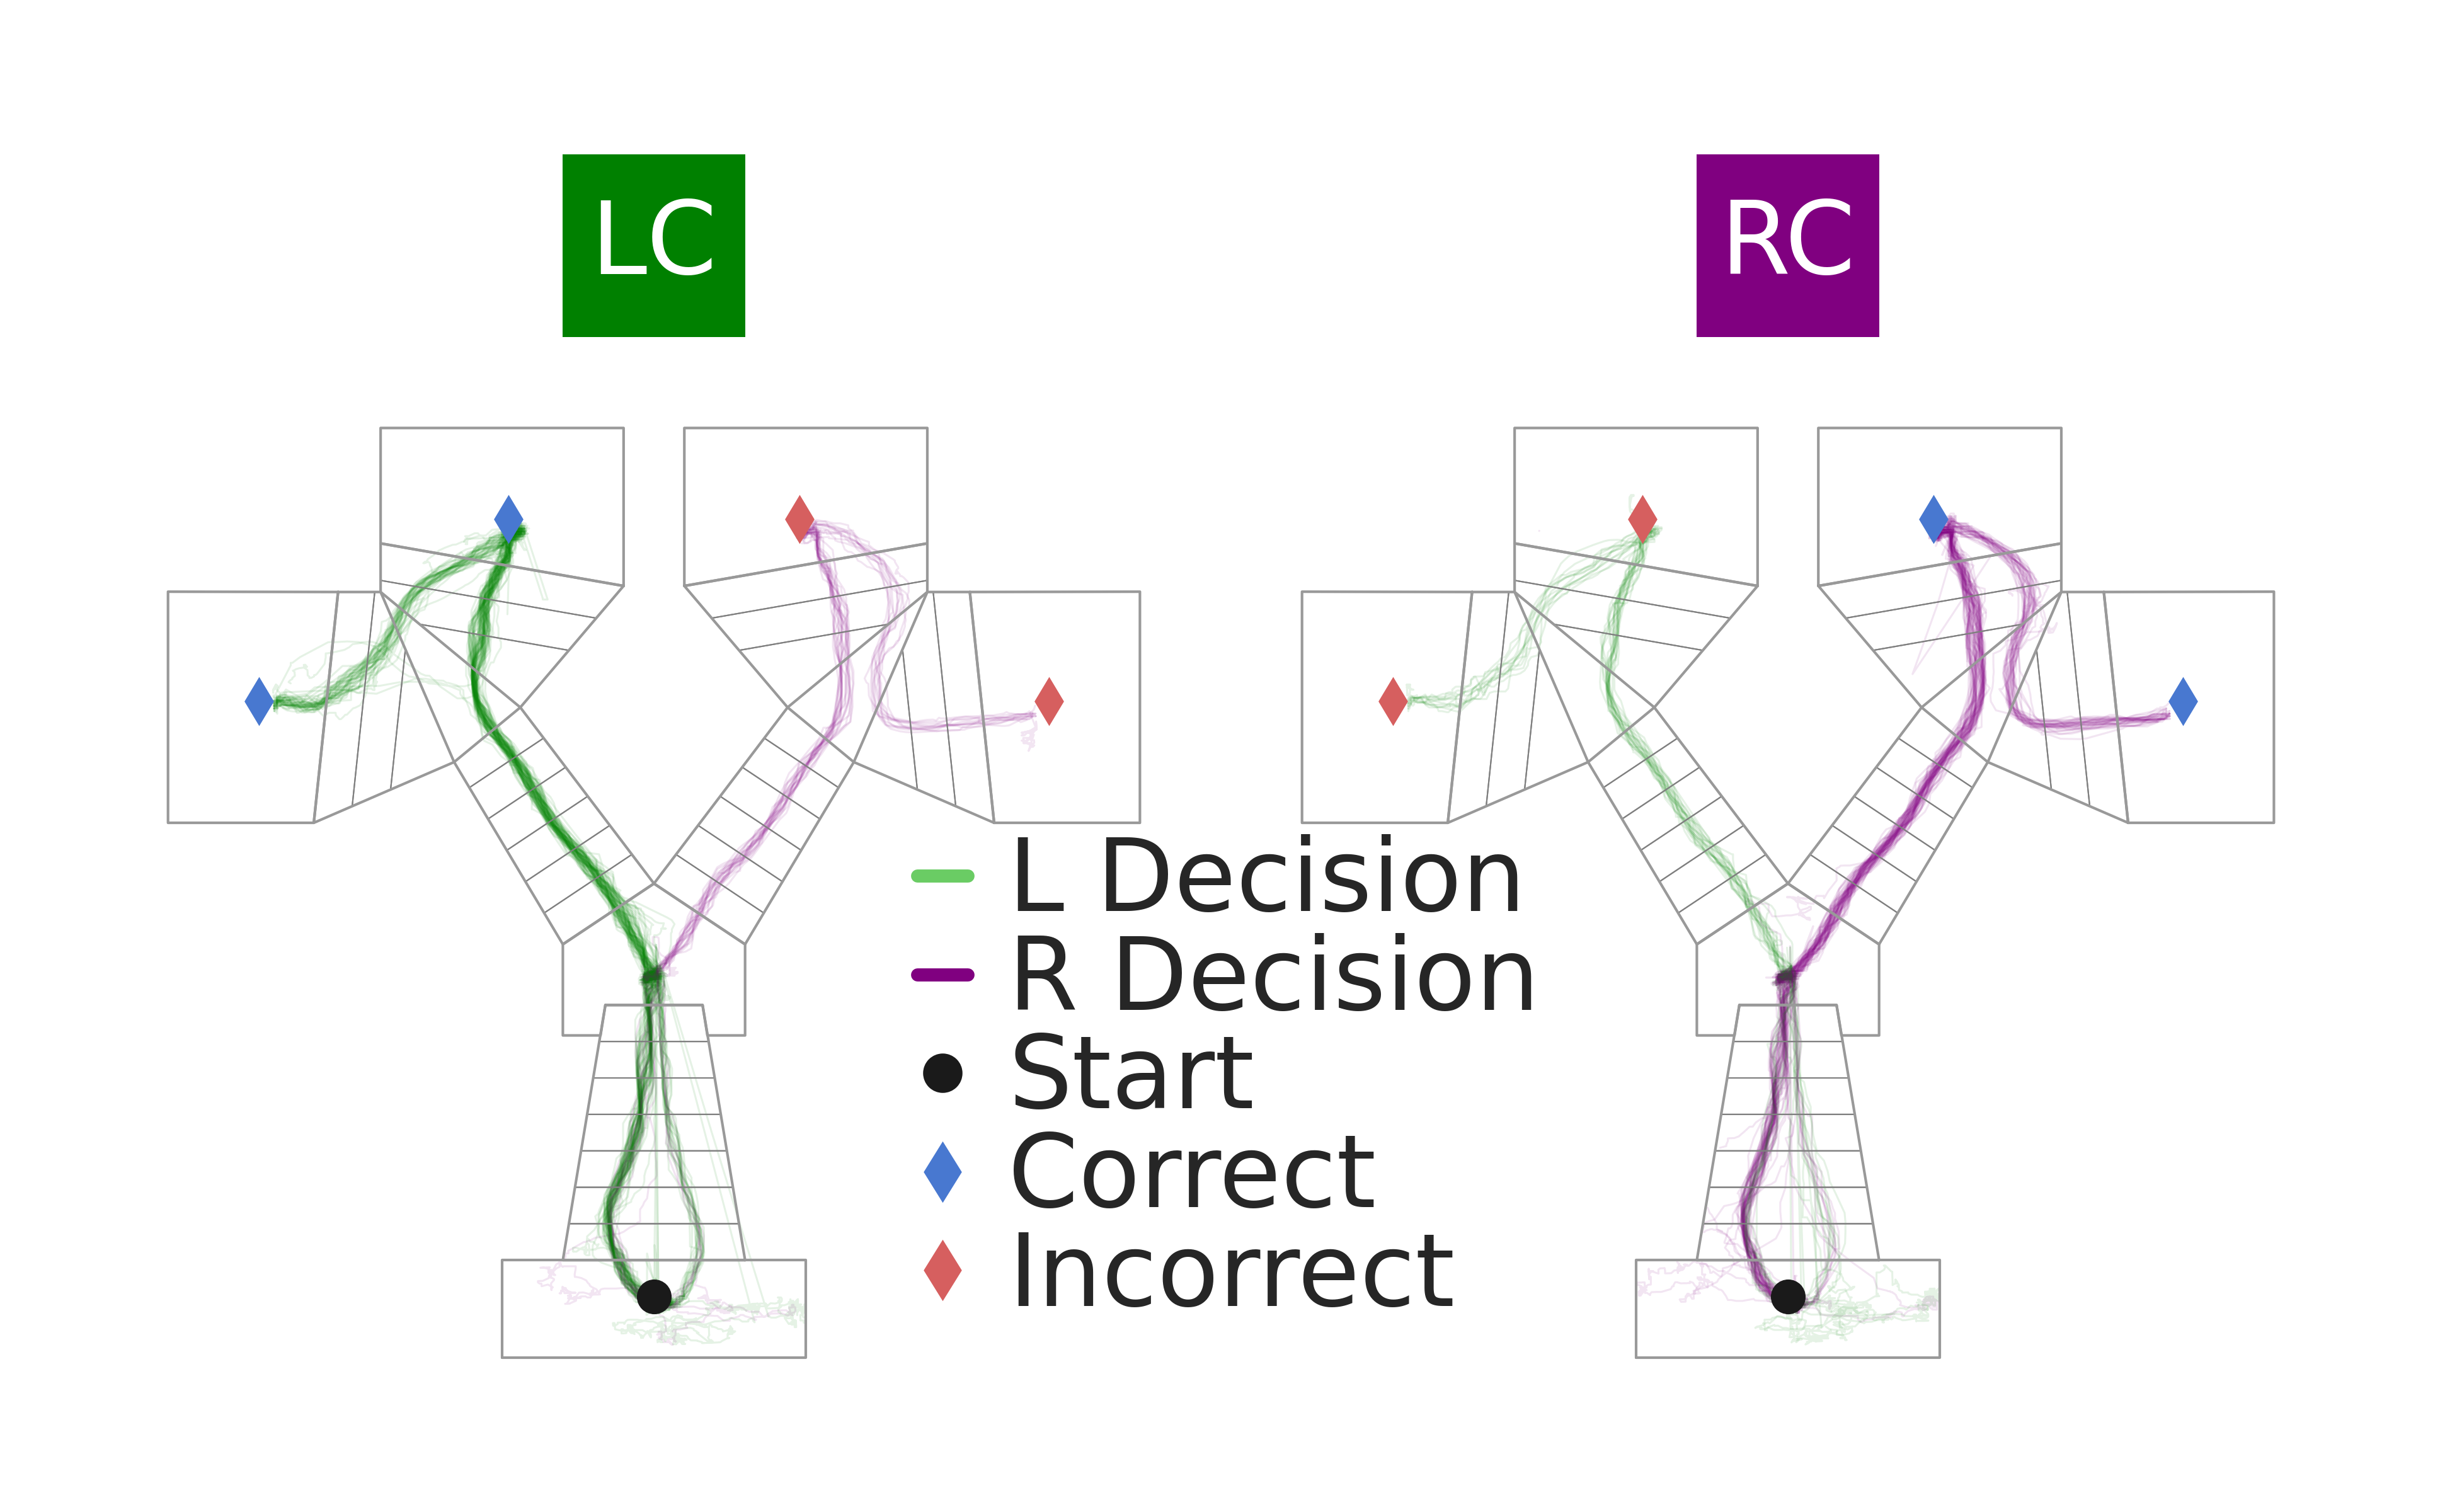

In [9]:
f.plot_maze_conditions()

(<Figure size 3600x2100 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

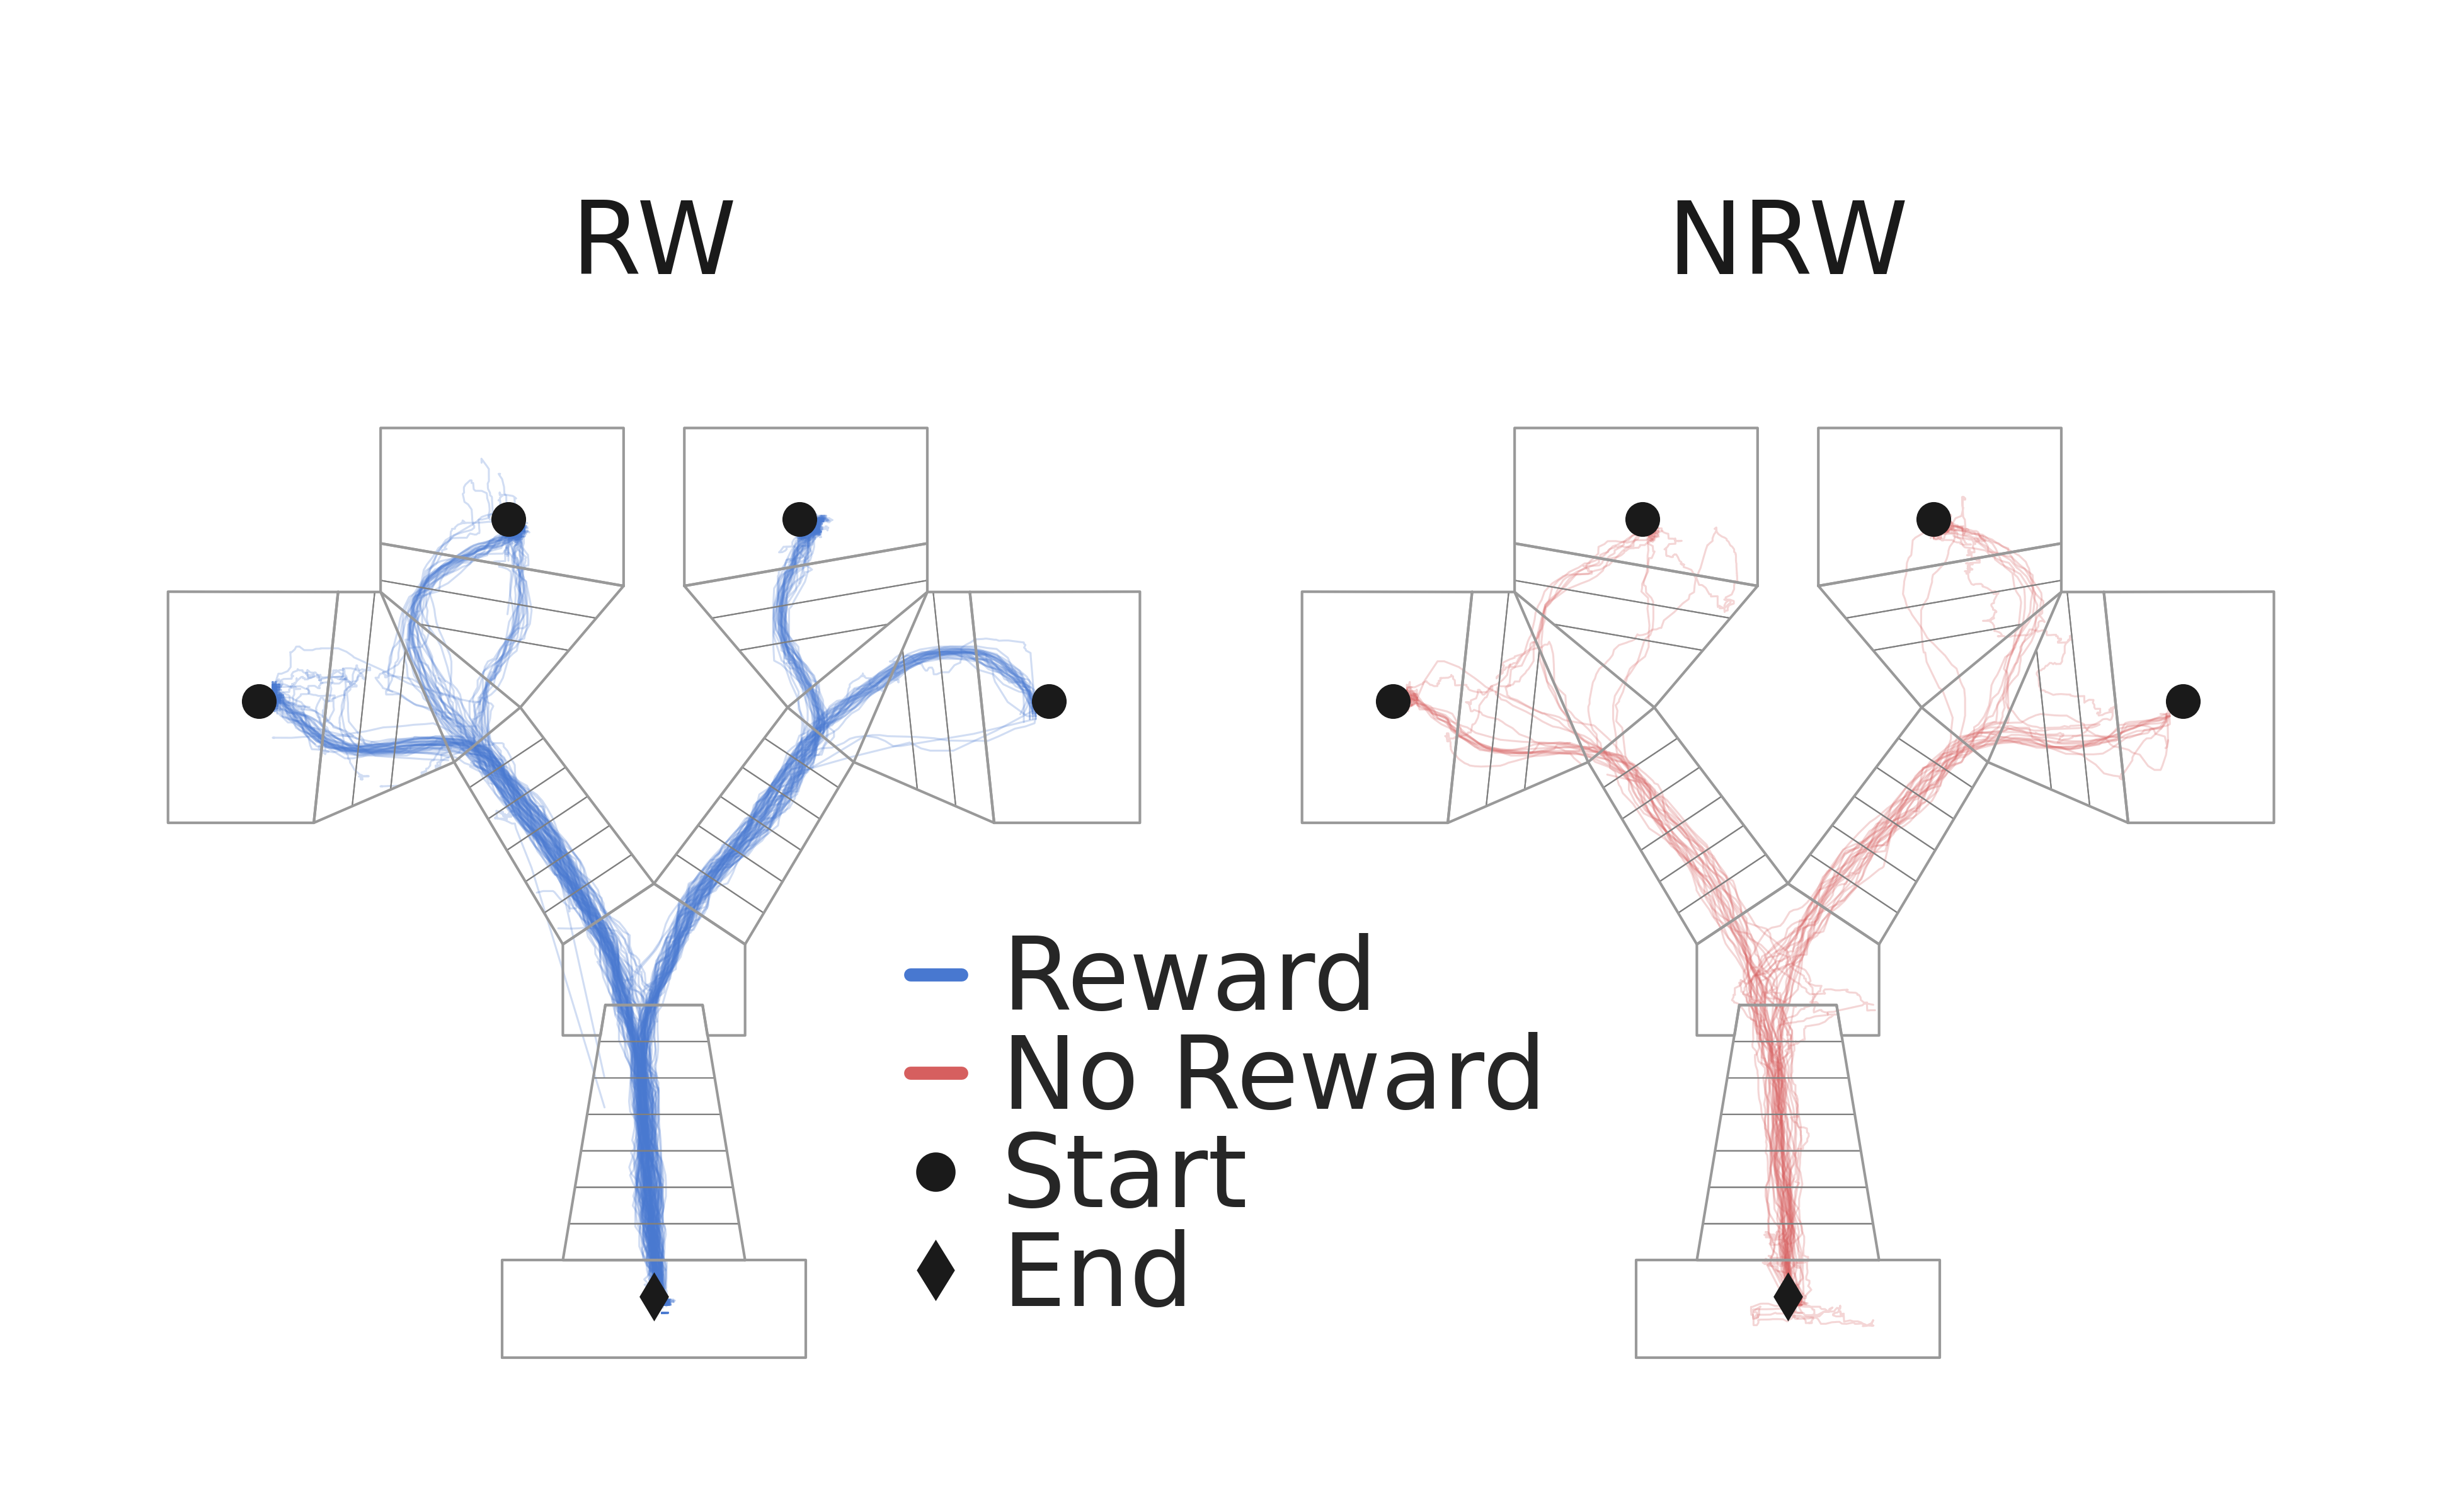

In [10]:
pf = reload(pf)
f = pf.RemapFigures(remap_comp='rw')
f.plot_maze_conditions()

In [4]:
pf = reload(pf)
analysis_options = dict(orig=dict(),
                        pearson=dict(corr_method='pearson'),
                        reward_blank=dict(reward_blank=True),
                        speed_blank=dict(speed_blank=True))

remap_options = ['cue', 'rw']
unit_options = ['cell', 'all']

@interact
def plot_remap_summary(unit_type=unit_options,remap_comp=remap_options, 
                       analysis_type=analysis_options.keys(), 
                       save=False):
    p = analysis_options[analysis_type]
    f = pf.RemapFigures(unit_type=unit_type, 
                        remap_comp=remap_comp,
                        **analysis_options[analysis_type])
    f.update_fontsize(fontscale=0.85)
    
    plot_str = ''
    if analysis_type=='pearson' :
        plot_str += '_rho'
    if analysis_type=='reward_blank':
        plot_str += '_rwb'
    if analysis_type=='speed_blank':
        plot_str += '_spb'
    
    f.plot_remap_behav_summary(fn_suffix=plot_str,save_flag=save)

interactive(children=(Dropdown(description='unit_type', options=('cell', 'all'), value='cell'), Dropdown(descr…

In [11]:
%%time
pf = reload(pf)
analysis_options = dict(orig=dict(),
                        pearson=dict(corr_method='pearson'),
                        reward_blank=dict(reward_blank=True),
                        speed_blank=dict(speed_blank=True))

remap_options = ['cue', 'rw']
unit_options = ['cell', 'all']

def plot_remap_summary(unit_type=unit_options,remap_comp=remap_options, 
                       analysis_type=analysis_options.keys(), 
                       save=False):
    p = analysis_options[analysis_type]
    f = pf.RemapFigures(unit_type=unit_type, 
                        remap_comp=remap_comp,
                        **analysis_options[analysis_type])
    f.update_fontsize(fontscale=0.85)
    
    plot_str = ''
    if analysis_type=='pearson' :
        plot_str += '_rho'
    if analysis_type=='reward_blank':
        plot_str += '_rwb'
    if analysis_type=='speed_blank':
        plot_str += '_spb'
    
    f.plot_remap_behav_summary(fn_suffix=plot_str,save_flag=save)
    
for r in remap_options:
    for u in unit_options:
        for a in analysis_options.keys():
            plot_remap_summary(unit_type=u, remap_comp=r, analysis_type=a, save=True)
            plt.close()


CPU times: user 3min 29s, sys: 859 ms, total: 3min 30s
Wall time: 3min 30s


In [18]:
"asdasdas".replace('das2', '2')

'asdasdas'

## partitions of behavioral data and correlation to remap

In [18]:
pf=reload(pf)


remap_options = ['cue', 'rw']
unit_options = ['cell', 'all']
pop_types = ['mean', 'pop']
@interact
def plot_remap_by_behav_part(unit_type=unit_options,remap_comp=remap_options, pop_type=pop_types,
                       save=False):
    f = pf.RemapFigures(unit_type=unit_type, 
                        remap_comp=remap_comp,
                        )    
    f.plot_remap_behav_partitions(remap_type=pop_type, save_flag=save)


interactive(children=(Dropdown(description='unit_type', options=('cell', 'all'), value='cell'), Dropdown(descr…

In [12]:
pf=reload(pf)

remap_options = ['cue', 'rw']
unit_options = ['cell', 'all']
pop_types = ['mean', 'pop']

def plot_remap_by_behav_part(unit_type=unit_options,remap_comp=remap_options, pop_type=pop_types,
                       save=False):
    f = pf.RemapFigures(unit_type=unit_type, 
                        remap_comp=remap_comp,
                        )    
    f.plot_remap_behav_partitions(remap_type=pop_type, save_flag=save)
    
for r in remap_options:
    for u in unit_options:
        plot_remap_by_behav_part(unit_type=u, remap_comp=r, pop_type='pop', save=True)
        plt.close()

## cue remap vs rw

(<Figure size 1500x1500 with 1 Axes>,
 <AxesSubplot:xlabel='${z}_{\\Delta \\tau_p \\: {se}} \\: Cue$', ylabel='${z}_{\\Delta \\tau_p \\: {se}} \\: Rw$'>)

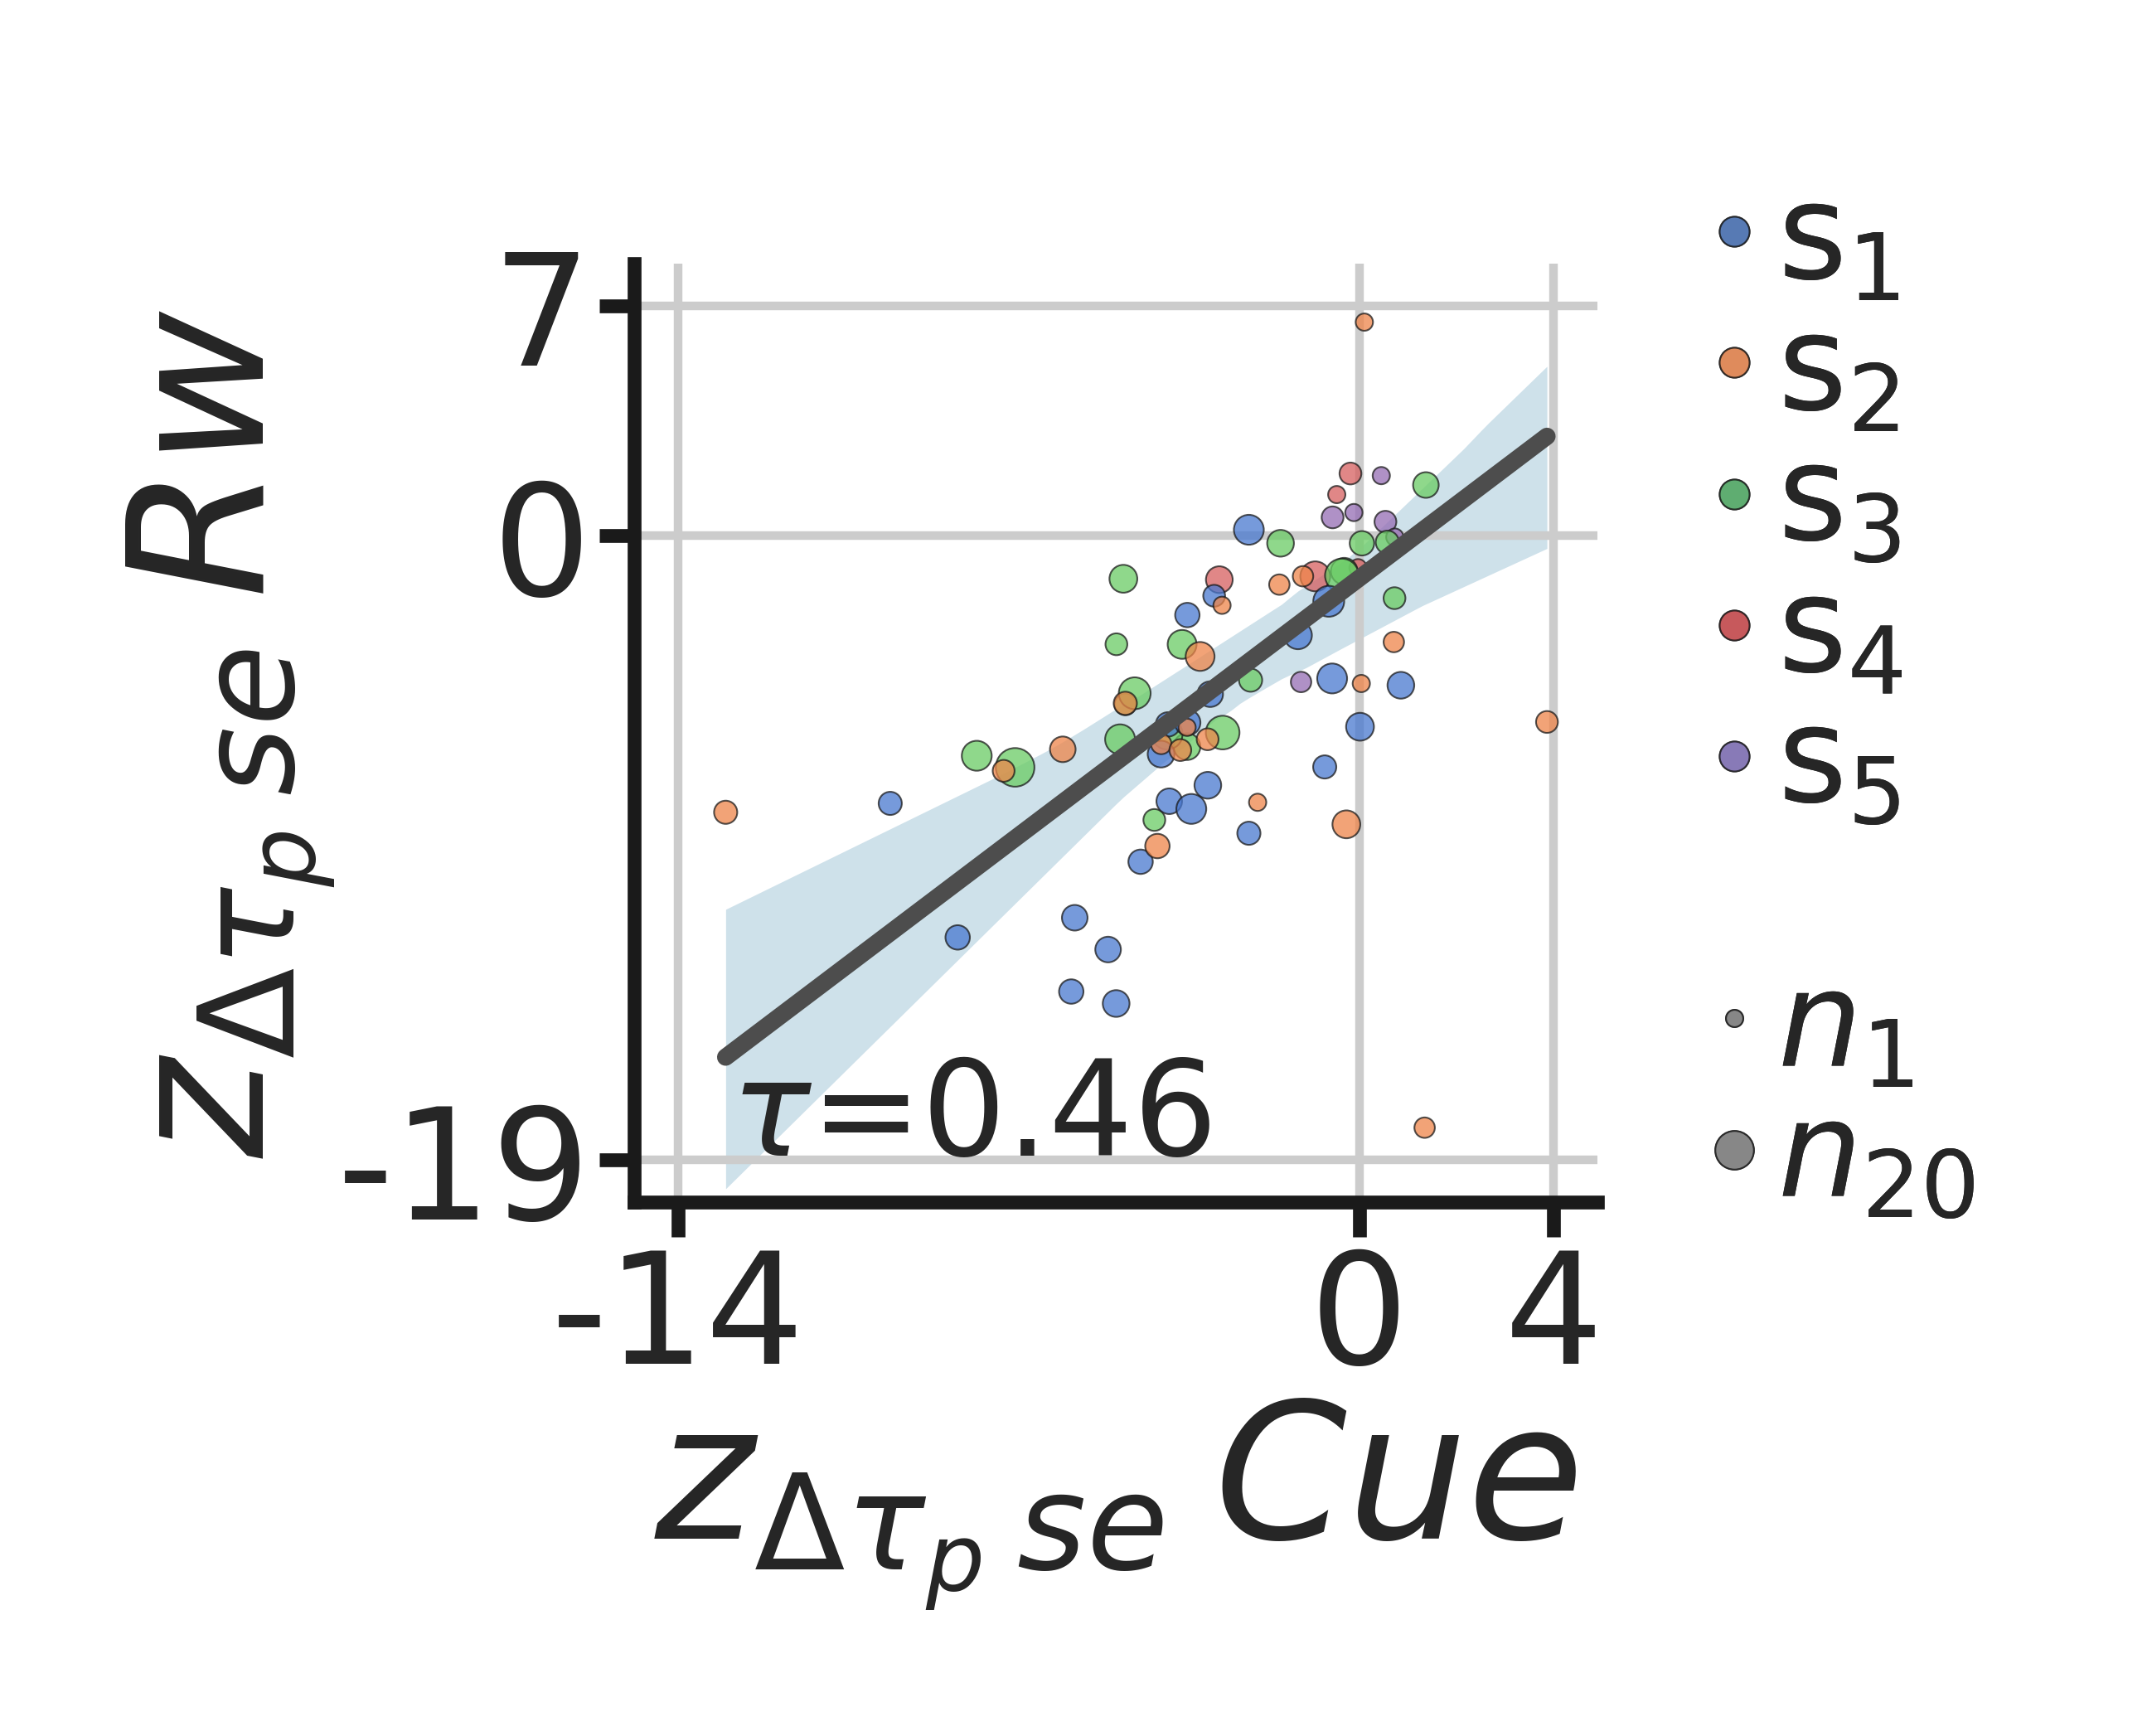

In [55]:
pf=reload(pf)

unit_type='cell'
f = pf.RemapFigures(unit_type=unit_type, remap_comp='cue')
f.plot_pop_corr_remap_cue_v_rw(legend=True, save_flag=True)

(<Figure size 1500x1500 with 1 Axes>,
 <AxesSubplot:xlabel='$\\bar{z}_{\\Delta \\tau \\: \\bar{se}} \\: Cue$', ylabel='$\\bar{z}_{\\Delta \\tau \\: \\bar{se}} \\: Rw$'>)

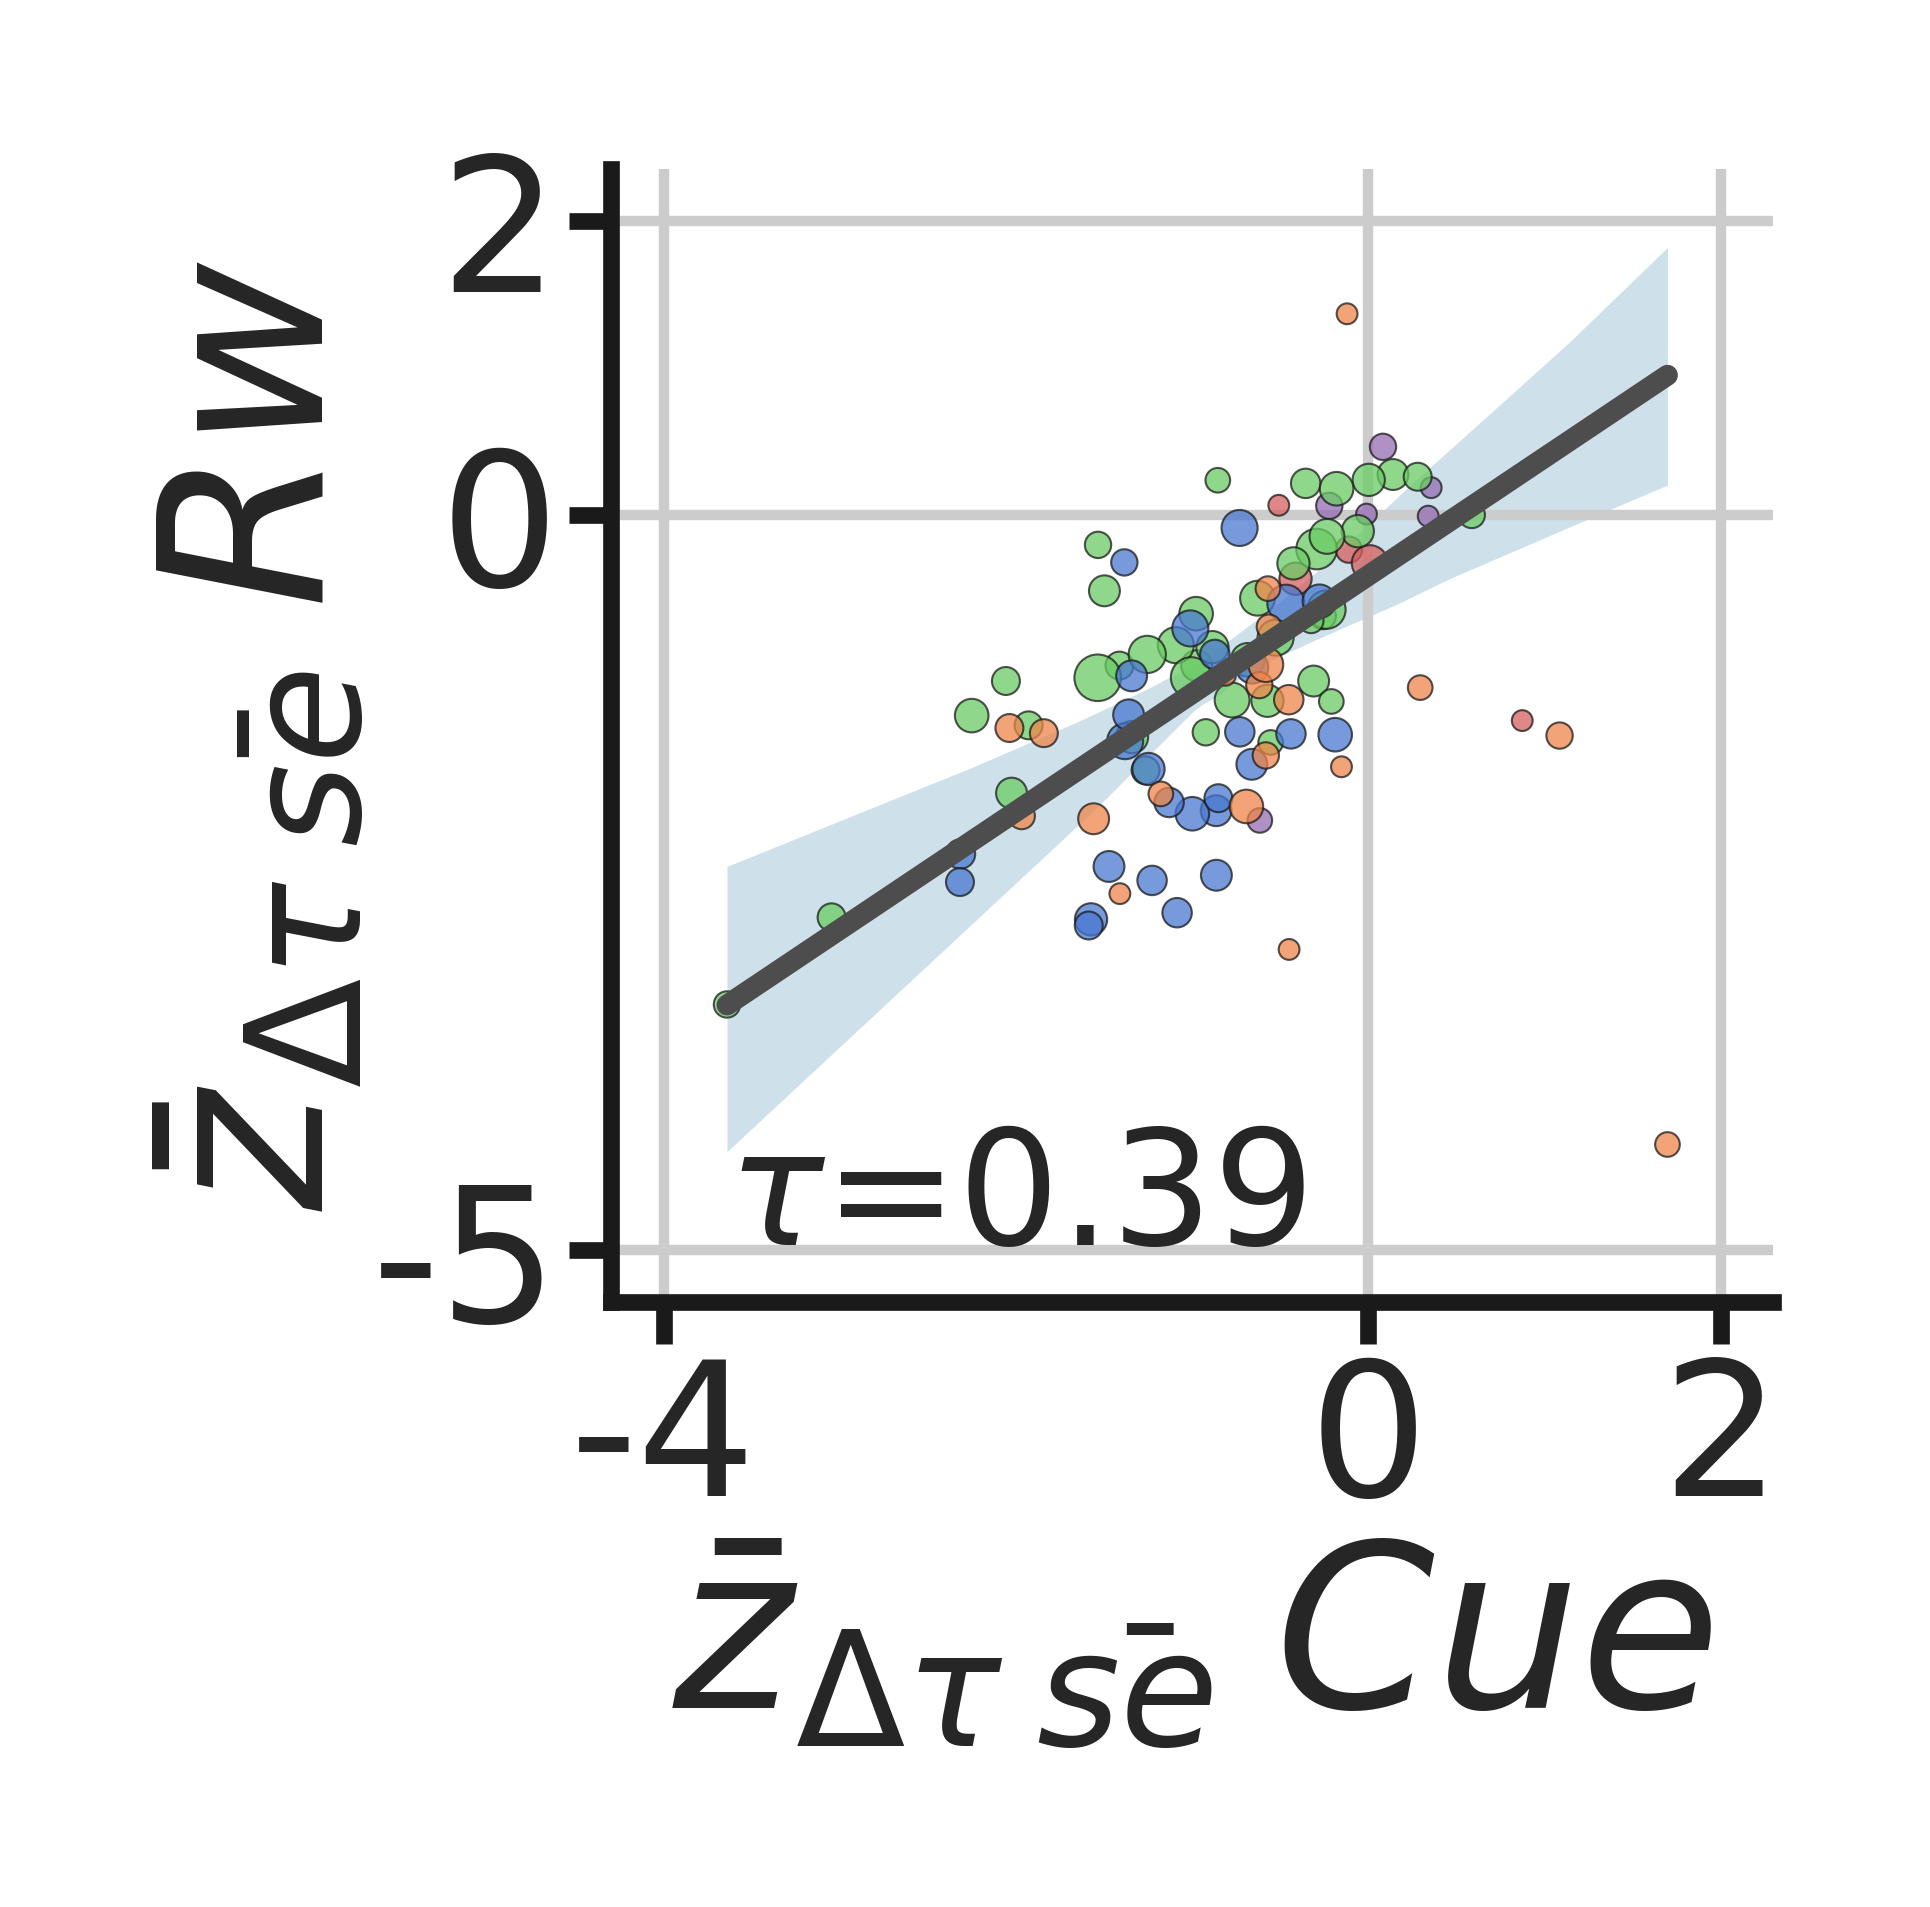

In [56]:
pf=reload(pf)

unit_type='cell'
f = pf.RemapFigures(unit_type=unit_type, remap_comp='cue')
f.plot_pop_mcorr_remap_cue_v_rw(save_flag=True)

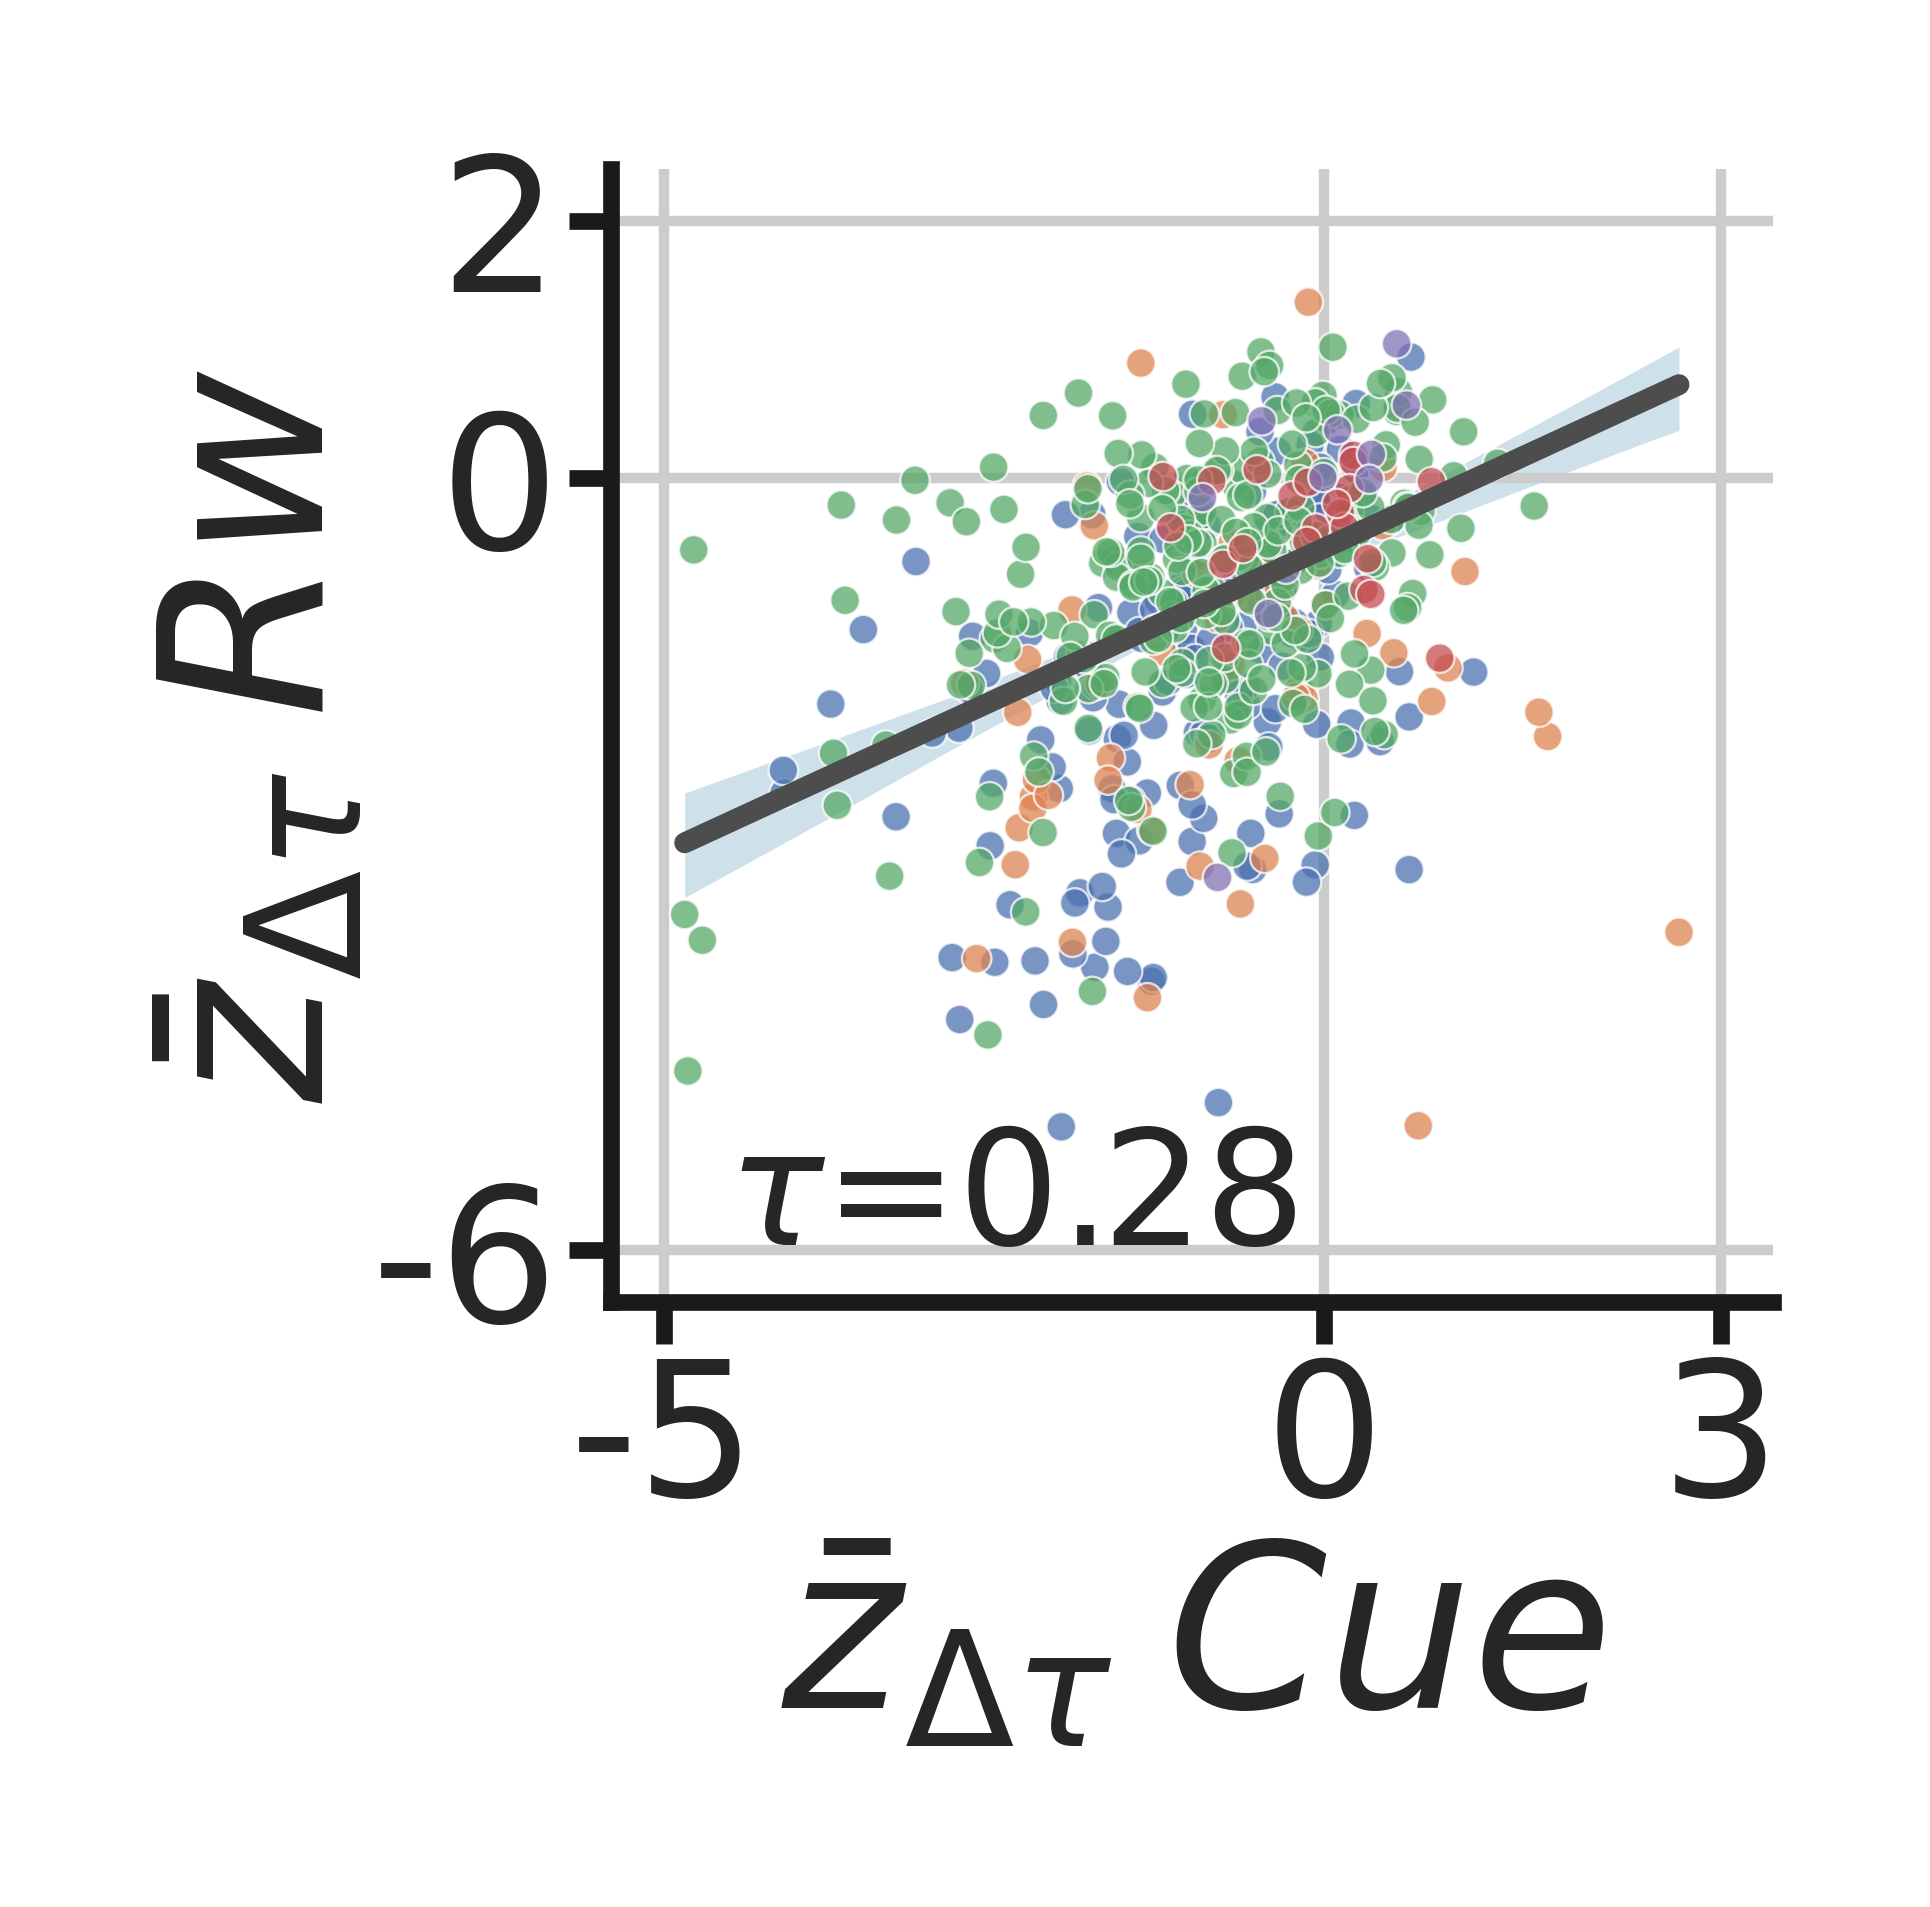

In [53]:
pf=reload(pf)

unit_type='cell'
f = pf.RemapFigures(unit_type=unit_type, remap_comp='cue')
f.plot_unit_corr_remap_cue_v_rw( save_flag=True)


In [46]:
from scipy import stats
self = f
table = self.zrc_b.copy()
table['cue'] = table[cue_score]
table['rw'] = table[rw_score]

table = table[['subject', 'task', 'session', 'unit_type', 'cue', 'rw']].copy()
table['x'] = table['cue']
table['y'] = table['rw']
table = table.dropna()
x = table['x'].values
y = table['y'].values
m, b = stats.siegelslopes(y, x)

xx = np.linspace(x.min(), x.max(), 100)

In [47]:
pf.get_reg_ci(x,y,eval_x=xx)

(array([-3.2092022 , -3.16710323, -3.12500426, -3.08290529, -3.04080632,
        -2.99868245, -2.95642583, -2.9141692 , -2.87191258, -2.82965596,
        -2.78739934, -2.74514271, -2.70288609, -2.66062947, -2.61837284,
        -2.57611622, -2.5338596 , -2.49160297, -2.44934635, -2.40708973,
        -2.3648331 , -2.32257648, -2.28031986, -2.23885021, -2.19743233,
        -2.15601445, -2.11459657, -2.07317869, -2.03176081, -1.99034293,
        -1.94892505, -1.90750717, -1.86608929, -1.82467141, -1.78325353,
        -1.74183565, -1.70041777, -1.65899989, -1.617582  , -1.57575688,
        -1.53291773, -1.48994659, -1.44632149, -1.4026964 , -1.36159257,
        -1.32226955, -1.2830489 , -1.24403159, -1.20402255, -1.16225368,
        -1.12018402, -1.0786088 , -1.03934392, -1.00007904, -0.96101384,
        -0.92554823, -0.88810678, -0.84978892, -0.81528419, -0.78387886,
        -0.75019072, -0.71510112, -0.68001152, -0.64513533, -0.61338297,
        -0.58180614, -0.55022931, -0.51881694, -0.4

## maze conditions

In [76]:
pf = reload(pf)

def plot_maze_conditions(remap_comp):
    remap_figure = pf.RemapFigures(remap_comp=remap_comp)
    f, ax = remap_figure.plot_maze_conditions()
    return f

def savefig(null):
    f = o.widget.result
    p = info.paths['figures']
    
    comp = o.widget.children[0].value
    figname = f"maze_remap_conditions_{comp}.png"
    f.savefig(p/figname, dpi=1500, bbox_inches='tight')

save_button = widgets.Button(description='Save Figure')
save_button.on_click(savefig)
    
o = widgets.interact_manual(plot_maze_conditions, remap_comp=['cue', 'rw','dir'])
display(save_button)

interactive(children=(Dropdown(description='remap_comp', options=('cue', 'rw', 'dir'), value='cue'), Button(de…

Button(description='Save Figure', style=ButtonStyle())

'cue'